### Визуализация решающих деревьев.

В этом ноутбуке будет рассмотрена библиотека `graphviz` и будет показано, как с её помощью можно визуализировать решающие деревья.

In [14]:
# Раскомментируйте эту строку, если вы ещё не установили библиотеку graphviz
# !pip install graphviz
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree

В качестве данных возьмём датасет с Kaggle https://www.kaggle.com/crawford/1000-cameras-dataset/download по определению цены камеры по её имеющимся характеристикам.

К её характеристикам относятся:

1) `Release date` - дата выпуска,

2) `Max resolution` - максимальное разрешение,

3) `Low resolution` - нижнее разрешение,

4) `Effective pixels`,

5) `Zoom wide (W)`,

6) `Zoom tele (T)`,

7) `Normal focus range` - нормальный фокусный диапазон,

8) `Macro focus range`,

9) `Storage included` - встроенный объём памяти,

10) `Weight (inc. batteries)` - вес,

11) `Dimensions` - габариты.

In [15]:
# Для того, чтобы деревья не получались слишком широкими, 
# будем их обучать на небольшой части датасета
camera_df = pd.read_csv('camera_dataset.csv')[:100]
camera_df = camera_df.drop('Model', axis=1)
print(camera_df.shape)
camera_df.head()

(100, 12)


,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


Посмотрим, как меняется изображение дерева при различных значениях параметров `max_depth`, `mean_samples_split`, `max_features`. 

In [16]:
X, y = camera_df.loc[:, camera_df.columns != 'Price'], camera_df['Price']

In [20]:
def get_graphviz_graph(decision_tree_regressor):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    
    decision_tree_regressor.fit(X, y)
    dot_data = tree.export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X.columns, class_names='Price',  
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data)  

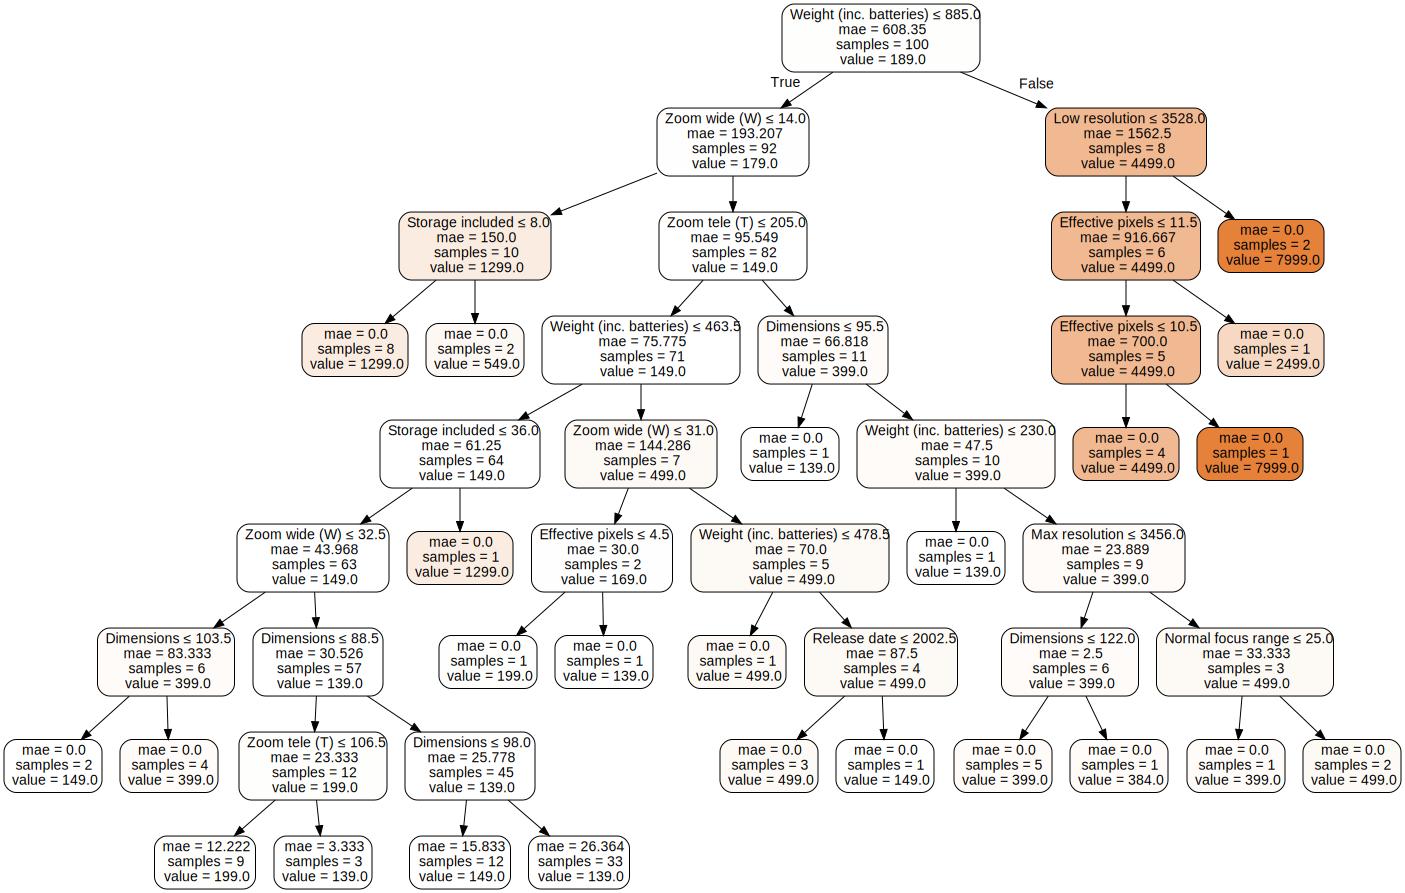

In [21]:
camera_regressor = tree.DecisionTreeRegressor(
    criterion='mae', max_depth=8, min_samples_split=2
)
graph = get_graphviz_graph(camera_regressor)
graph

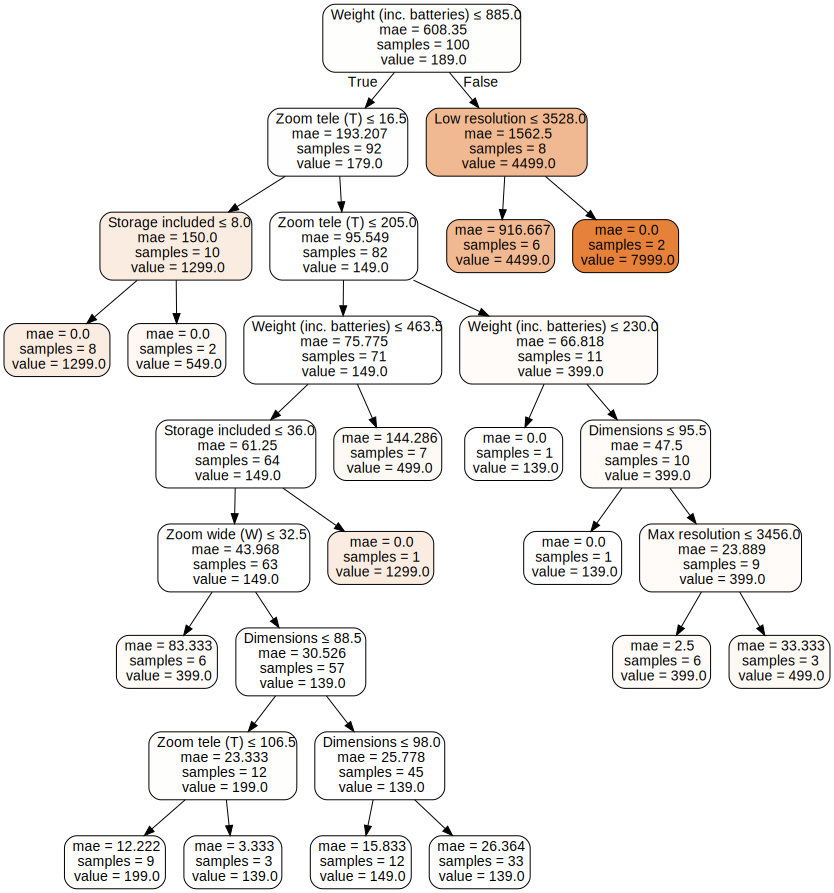

In [22]:
camera_regressor = tree.DecisionTreeRegressor(
    criterion='mae', max_depth=8, min_samples_split=8
)
graph = get_graphviz_graph(camera_regressor)
graph

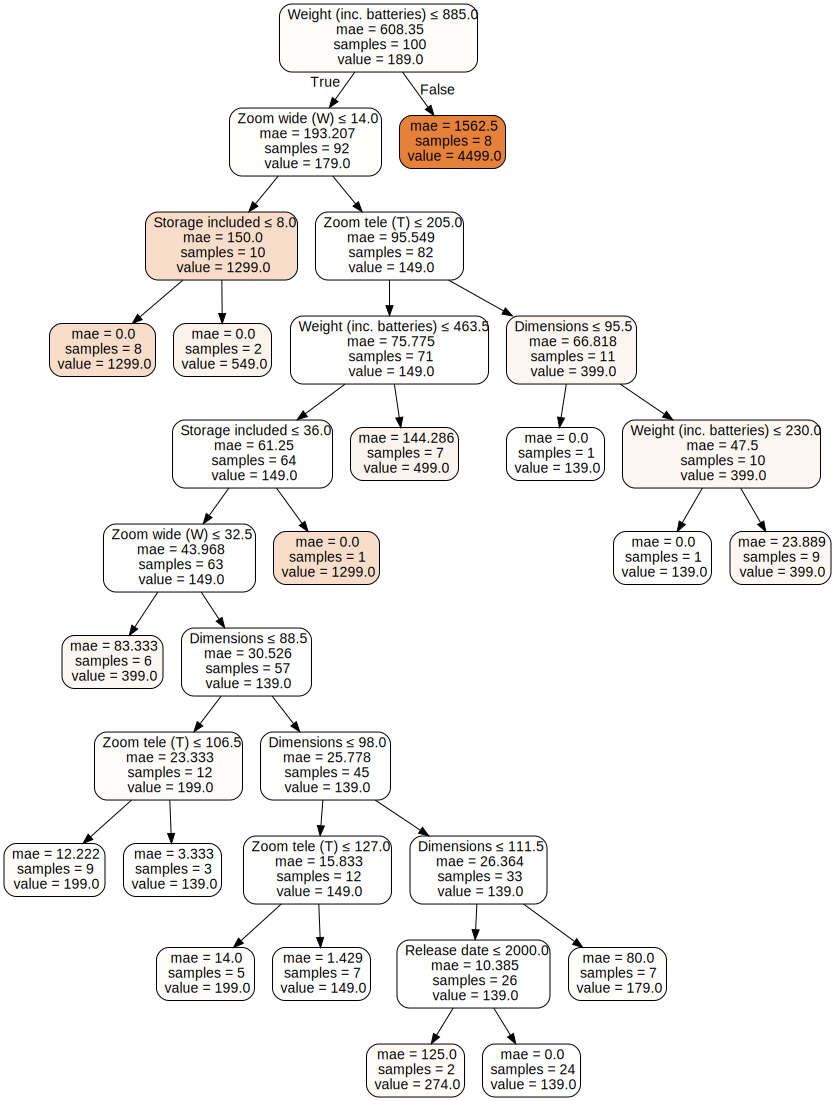

In [23]:
camera_regressor = tree.DecisionTreeRegressor(
    criterion='mae', max_depth=10, min_samples_split=10
)
graph = get_graphviz_graph(camera_regressor)
graph

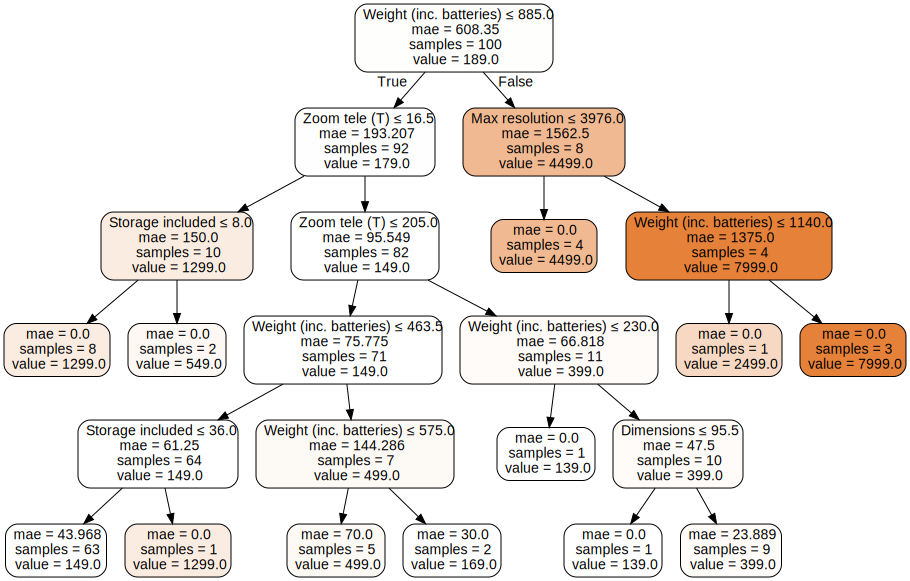

In [24]:
camera_regressor = tree.DecisionTreeRegressor(
    criterion='mae', max_depth=5, min_samples_split=2
)
graph = get_graphviz_graph(camera_regressor)
graph

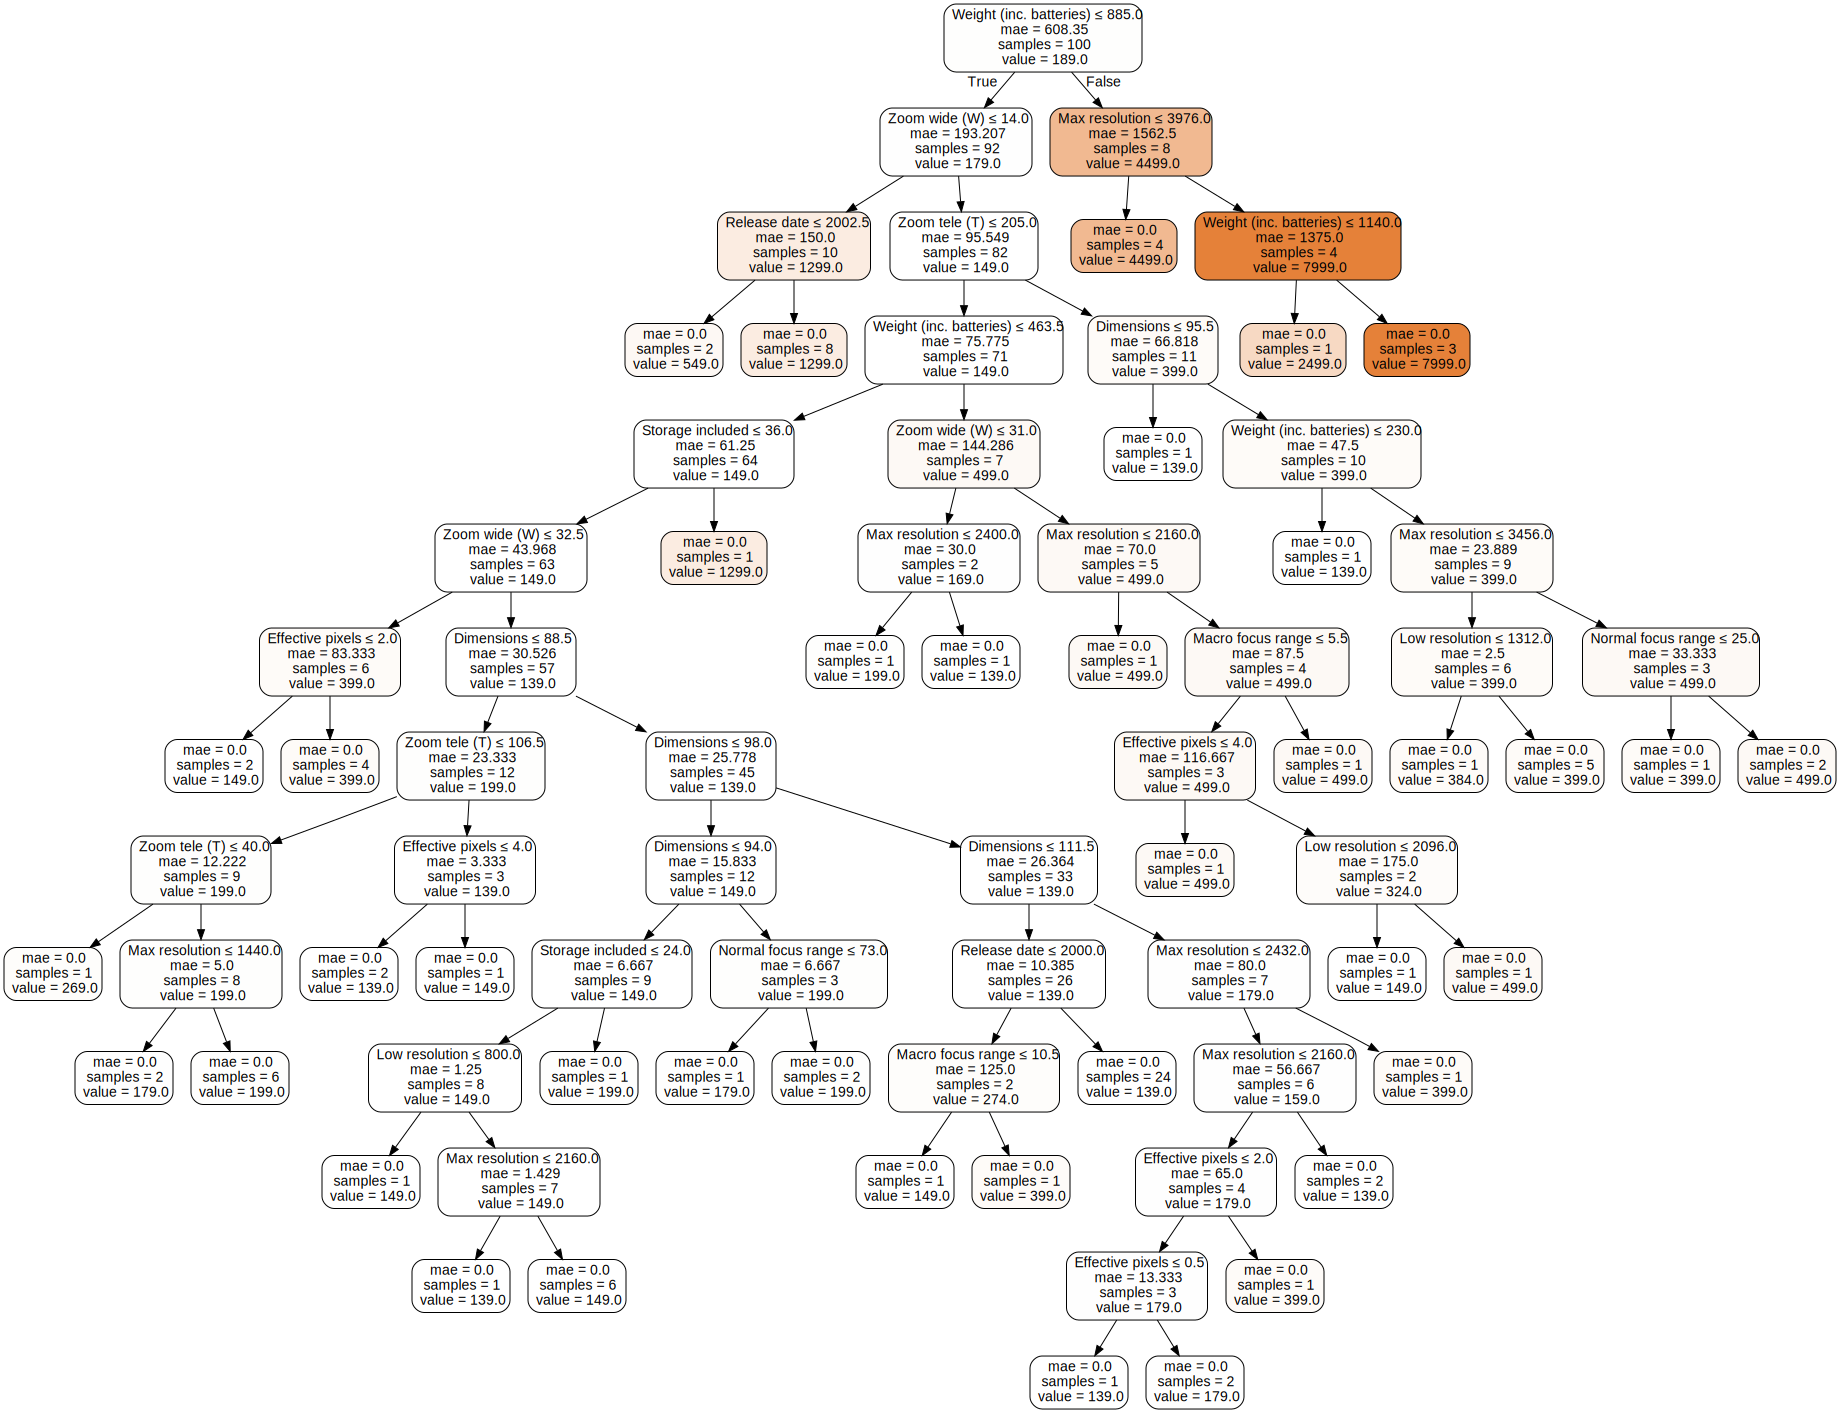

In [25]:
camera_regressor = tree.DecisionTreeRegressor(
    criterion='mae', max_depth=20, min_samples_split=2
)
graph = get_graphviz_graph(camera_regressor)
graph

**Вывод.**

 По построенной визуализации дерева можно увидеть, что большая часть разбиений вершин вполне соотносится со здравым смыслом и логикой принятия решений человеком. Например, чем больше zoom камеры, тем больше должна быть цена при прочих равных или чем больше встроенной памяти имеет камера, тем больше должна быть её цена.

 При этом при варьировании параметра `min_samples_split` наблюдается такая закономерность: чем больше значение `min_samples_split`, тем меньше глубина дерева, но само дерево шире. Аналогичная ситуация происходит и при уменьшении значения `max_depth`.

 Логично брать в качестве значения `max_depth` $min(\text{features_count}, \text{log}_2 n)$, `min_samples_split` около 5 и потом подбирать в их окрестности оптимальные параметры по кросс-валидации. В любом случае предварительный выбор параметров стоит делать, опираясь прежде всего на размер датасета и количество признаков в нём. 

Из проделанной работы можем сделать вывод, что решающее дерево - действительно хорошо интерпретируемая модель и при достаточно чистых данных оно может дать весьма логичную систему принятия решений.